# 2515 윤웅섭
* 1학기 프로젝트
* 빅데이터

## I. 문제 정의 및 가설 수렴
* 인구가 많을수록 탄소배출량이 많을 것이다.
* CO2 배출량이 많으면, 평균 수명도 짧을 것이다.
* 대한민국의 탄소 배출량은 상위권에 속할 것이다. 


## II. 데이터 가져오기 및 로드, 데이터 처리

In [1]:
# !kaggle datasets download -d sansuthi/global-co2-emissions

In [2]:
# 압축 풀기
# !tar -xvf global-co2-emissions.zip

In [1]:
# 임포트 하기
import numpy as np # 데이터 분석 -> 많은 데이터 -> 연산하기 위한 라이브러리다
import pandas as pd # 된장찌개의 된장 문학작품의 제재
import matplotlib.pyplot as plt # 시각화
import seaborn as sns # 시각화

In [2]:
# 데이터 읽어오기
df = pd.read_csv('CO2Emission_LifeExp.csv')
df.head(10) # default = 5

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
0,Afghanistan,AFG,9900004,7.13,0.28,35383032,63.763
1,Albania,ALB,5208319,4.45,1.80,2886438,78.194
2,Algeria,DZA,156220560,0.17,3.85,40551392,76.298
3,Angola,AGO,30566933,3.13,1.06,28842489,59.925
4,Anguilla,AIA,30262,1.52,2.10,14429,81.441
5,Antigua and Barbuda,ATG,438763,1.51,4.64,94527,76.617
6,Argentina,ARG,200708270,0.16,4.61,43508460,76.221
7,Armenia,ARM,4597845,3.06,1.57,2936143,74.640
8,Aruba,ABW,286871,1.51,2.74,104872,75.868
9,Australia,AUS,414988700,-0.98,17.10,24262712,82.959


In [4]:
# 컬럼명 바꾸기
df.columns = ['나라','나라코드','CO2배출량','연간변화율','1인당 배출량','인구','수명']
df.head()

,나라,나라코드,CO2배출량,연간변화율,1인당 배출량,인구,수명
0,Afghanistan,AFG,9900004,7.13,0.28,35383032,63.763
1,Albania,ALB,5208319,4.45,1.80,2886438,78.194
2,Algeria,DZA,156220560,0.17,3.85,40551392,76.298
3,Angola,AGO,30566933,3.13,1.06,28842489,59.925
4,Anguilla,AIA,30262,1.52,2.10,14429,81.441


In [6]:
# 데이터 정보 1
df.shape

(208, 7)

In [7]:
# 데이터 정보 2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   나라       208 non-null    object 
 1   나라코드     208 non-null    object 
 2   CO2배출량   208 non-null    int64  
 3   연간변화율    208 non-null    float64
 4   1인당 배출량  208 non-null    float64
 5   인구       208 non-null    int64  
 6   수명       208 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 9.8+ KB


In [6]:
# null 값 확인
df.isnull().sum()

나라         0
나라코드       0
CO2배출량     0
연간변화율      0
1인당 배출량    0
인구         0
수명         0
dtype: int64

In [9]:
# 상위 5개 보기
df.head()

,나라,나라코드,CO2배출량,연간변화율,1인당 배출량,인구,수명
0,Afghanistan,AFG,9900004,7.13,0.28,35383032,63.763
1,Albania,ALB,5208319,4.45,1.80,2886438,78.194
2,Algeria,DZA,156220560,0.17,3.85,40551392,76.298
3,Angola,AGO,30566933,3.13,1.06,28842489,59.925
4,Anguilla,AIA,30262,1.52,2.10,14429,81.441


## III. EDA (탐색적 데이터 분석)

### 가설 1. 인구가 많을수록 탄소배출량이 많을 것이다.

In [8]:
# 인구수 기준 내림차순 정렬 데이터 프레임 생성하기
df_people = df.sort_values(by='인구', ascending=False)
df_people.reset_index(drop=True, inplace=True)
df_people.index += 1
df_people.head(10)

,나라,나라코드,CO2배출량,연간변화율,1인당 배출량,인구,수명
0,China,CHN,10432751400,-0.28,7.38,1414049351,76.210
1,India,IND,2533638100,4.71,1.91,1324517249,68.897
2,United States,USA,5011686600,-2.01,15.52,323015995,78.885
3,Indonesia,IDN,530035650,6.41,2.03,261556381,71.035
4,Brazil,BRA,462994920,-6.08,2.25,206163053,75.230
5,Pakistan,PAK,178013820,9.13,0.87,203631353,66.770
6,Nigeria,NGA,82634214,0.70,0.44,185960241,53.541
7,Bangladesh,BGD,74476230,4.50,0.47,157977153,71.785
8,Russia,RUS,1661899300,-2.13,11.44,145275383,71.835
9,Japan,JPN,1239592060,-1.21,9.70,127763265,84.090


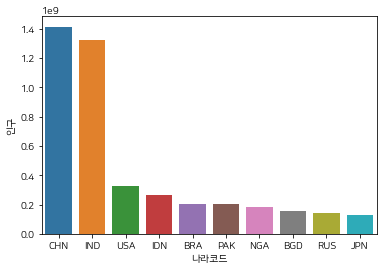

In [11]:
# 인구수 시각화 하기
sns.barplot(x='나라코드', y='인구', data=df_people.head(10))
plt.show()

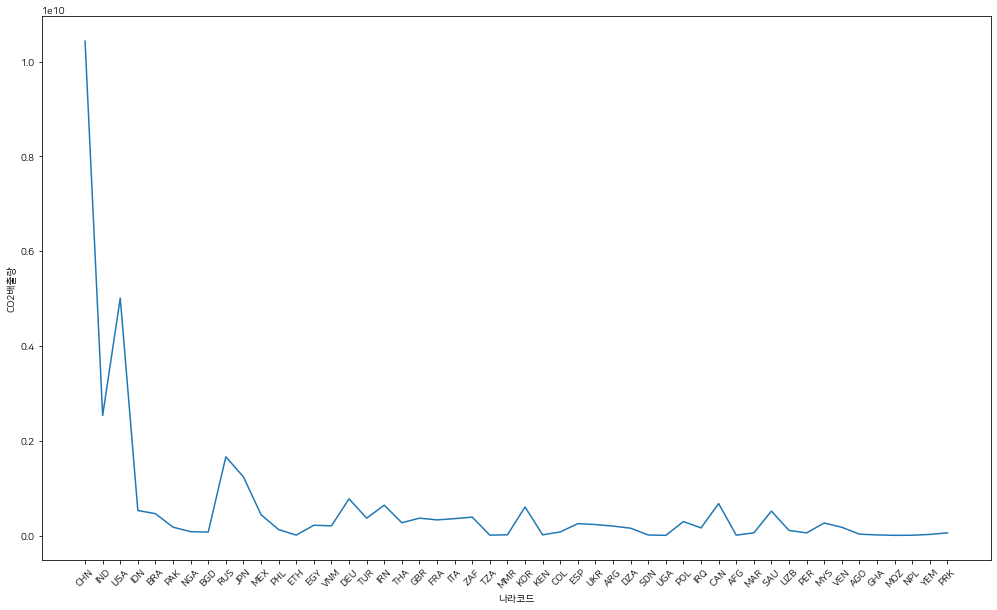

In [12]:
# 인구수와 co2 배출량 관계 시각화하기
plt.figure(figsize=(17,10))
sns.lineplot(x='나라코드',y='CO2배출량', data=df_people.head(50))
plt.xticks(rotation=45)
plt.show()

In [13]:
# co2 배출량 최다 국가 데이터 프레임 생성하기
top_co2 = df.sort_values(by='CO2배출량', ascending=False).head(10)
top_co2.reset_index(drop=True, inplace=True)
top_co2.index += 1
top_co2

,나라,나라코드,CO2배출량,연간변화율,1인당 배출량,인구,수명
1,China,CHN,10432751400,-0.28,7.38,1414049351,76.210
2,United States,USA,5011686600,-2.01,15.52,323015995,78.885
3,India,IND,2533638100,4.71,1.91,1324517249,68.897
4,Russia,RUS,1661899300,-2.13,11.44,145275383,71.835
5,Japan,JPN,1239592060,-1.21,9.70,127763265,84.090
6,Germany,DEU,775752190,1.28,9.44,82193768,80.902
7,Canada,CAN,675918610,-1.00,18.58,36382944,82.117
8,Iran,IRN,642560030,2.22,8.08,79563989,76.047
9,South Korea,KOR,604043830,0.45,11.85,50983457,82.379
10,Indonesia,IDN,530035650,6.41,2.03,261556381,71.035


In [14]:
# 전체 국가의 이산화탄소 배출량과 상위 10개국의 이산화탄소 배출량
round(df['CO2배출량'].mean(),1), round(top_co2['CO2배출량'].mean(),1)

(166151022.9, 2410787777.0)

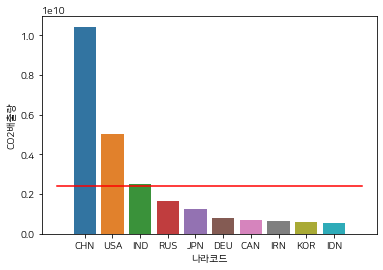

In [15]:
# co2 배출량 시각화 하기
sns.barplot(x='나라코드', y='CO2배출량', data=top_co2)
plt.plot([-1, 10], [2410787777.0, 2410787777.0], color='red') #평균값 직선 그어주기
plt.show()

In [16]:
# 상위 30개국의 평균 
life = round(top_co2['수명'].head(30).mean(),1)
life

77.2

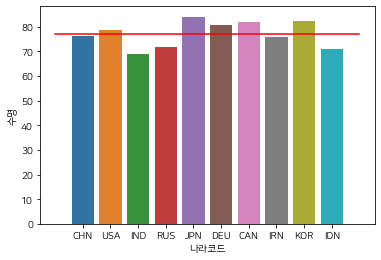

In [17]:
# 평균 수명 시각화하기
sns.barplot(x='나라코드', y='수명', data=top_co2)
plt.plot([-1, 10], (life,life), color='red')
plt.show()

In [18]:
# 연간변화율 기준 내림차순 df 만들기
df_year = df.sort_values(by='연간변화율', ascending=False)
df_year.reset_index(drop=True, inplace=True)
df_year.index += 1
df_year

,나라,나라코드,CO2배출량,연간변화율,1인당 배출량,인구,수명
1,North Korea,PRK,58708734,19.49,2.32,25307665,71.711
2,Mongolia,MNG,18574260,18.09,6.08,3056364,69.321
3,Philippines,PHL,126922662,12.37,1.22,103663816,70.802
4,Nepal,NPL,7833787,10.10,0.29,27263433,69.848
5,Pakistan,PAK,178013820,9.13,0.87,203631353,66.770
...,...,...,...,...,...,...,...
204,Ecuador,ECU,40065690,-4.85,2.43,16491116,76.365
205,Trinidad and Tobago,TTO,34974263,-5.92,25.39,1377560,73.100
206,Bulgaria,BGR,50872910,-6.00,7.11,7151953,74.703
207,Brazil,BRA,462994920,-6.08,2.25,206163053,75.230


In [19]:
# 한국 살펴보기
df_year[df_year.나라코드 == 'KOR']

,나라,나라코드,CO2배출량,연간변화율,1인당 배출량,인구,수명
176,South Korea,KOR,604043830,0.45,11.85,50983457,82.379


In [20]:
# 연간변화율 상위 10개국
df_year.head(10)

,나라,나라코드,CO2배출량,연간변화율,1인당 배출량,인구,수명
1,North Korea,PRK,58708734,19.49,2.32,25307665,71.711
2,Mongolia,MNG,18574260,18.09,6.08,3056364,69.321
3,Philippines,PHL,126922662,12.37,1.22,103663816,70.802
4,Nepal,NPL,7833787,10.10,0.29,27263433,69.848
5,Pakistan,PAK,178013820,9.13,0.87,203631353,66.770
6,Sri Lanka,LKA,18454691,8.55,0.88,21021171,76.482
7,Peru,PER,57692879,8.16,1.87,30926032,76.044
8,Ukraine,UKR,233220080,8.03,5.22,44713702,71.711
9,Laos,LAO,4531276,7.92,0.66,6845846,66.924
10,Cambodia,KHM,6496958,7.68,0.41,15766292,68.977


In [21]:
# 연간변화율 상위 30개국
df_year.head(30)

,나라,나라코드,CO2배출량,연간변화율,1인당 배출량,인구,수명
1,North Korea,PRK,58708734,19.49,2.32,25307665,71.711
2,Mongolia,MNG,18574260,18.09,6.08,3056364,69.321
3,Philippines,PHL,126922662,12.37,1.22,103663816,70.802
4,Nepal,NPL,7833787,10.10,0.29,27263433,69.848
5,Pakistan,PAK,178013820,9.13,0.87,203631353,66.770
6,Sri Lanka,LKA,18454691,8.55,0.88,21021171,76.482
7,Peru,PER,57692879,8.16,1.87,30926032,76.044
8,Ukraine,UKR,233220080,8.03,5.22,44713702,71.711
9,Laos,LAO,4531276,7.92,0.66,6845846,66.924
10,Cambodia,KHM,6496958,7.68,0.41,15766292,68.977


In [22]:
# 연간변화율 평균 구하기
year_mean = round(df_year.연간변화율.mean(),1)
year_mean

2.6

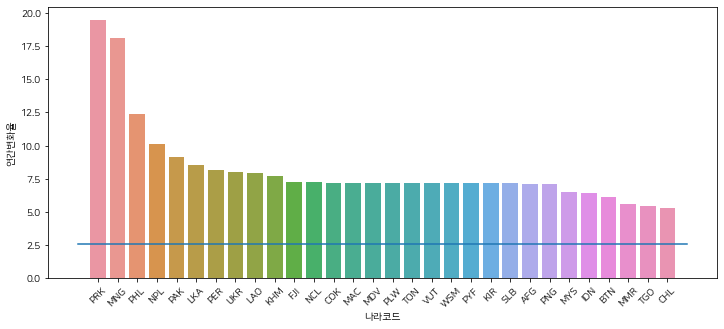

In [23]:
# 연간변화율 시각화하기
plt.figure(figsize=(12,5))
sns.barplot(x='나라코드',y='연간변화율', data = df_year.head(30))
plt.plot([-1,30],(year_mean,year_mean))
plt.xticks(rotation=45)
plt.show()

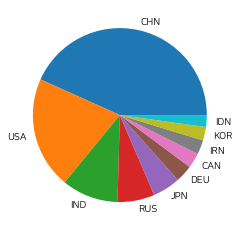

In [24]:
# 마지막 재미로 중국이 차지하는 이산화탄소의 비율 (상위 10개국 기준)
plt.pie(x='CO2배출량', data=top_co2, labels='나라코드')
plt.show()